In [1]:
#imports
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
#Let's open the data and see what is happening.
worldbank = pd.read_csv('/Users/ofrioren/GIT/Capstone/Data_Extract_From_World_Development_Indicators.csv')
worldbank.head()

,Country Name,Country Code,Series Name,Series Code,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,United States,USA,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,0.5,0.7,1.2,1.2,1,1.2,1,1,0.2,0.2,..,..
1,United States,USA,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,..,12.49002552,16.19919777,16.49056816,16.80215836,16.76750183,16.62964439,16.66580582,18.75621986,17.3625679,16.57115173,..
2,United States,USA,Out-of-pocket expenditure per capita (current ...,SH.XPD.OOPC.PC.CD,..,685.3955451,1058.308042,1089.018652,1118.350962,1130.686646,1164.601932,1205.284197,1167.734563,1285.330047,..,..
3,United States,USA,Out-of-pocket expenditure (% of current health...,SH.XPD.OOPC.CH.ZS,..,15.11737442,11.98743725,11.77453041,11.64962196,11.41782665,11.32823181,11.30830574,9.93104649,10.70016861,..,..
4,United States,USA,Proportion of population pushed below the $2.1...,SH.UHC.NOP1.ZS,..,0.01,0,0,0,0,0,0,0,0,..,..


In [5]:
#I'm going to filter out some of the data we do not need and rearrange the DataFrame.
worldbank.columns


Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1990 [YR1990]', '2000 [YR2000]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]'],
      dtype='object')

In [7]:
#Deleting columns with insufficient or irrelevant data and rows with missing values.
worldbank = worldbank[['Series Name', '1990 [YR1990]', '2000 [YR2000]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]']]
worldbank = worldbank.drop(worldbank.index[19:24])
worldbank = worldbank.drop(worldbank.index[16])
worldbank

,Series Name,1990 [YR1990],2000 [YR2000],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Poverty headcount ratio at $2.15 a day (2017 P...,0.5,0.7,1.2,1.2,1,1.2,1,1,0.2,0.2
1,Current health expenditure (% of GDP),..,12.49002552,16.19919777,16.49056816,16.80215836,16.76750183,16.62964439,16.66580582,18.75621986,17.3625679
2,Out-of-pocket expenditure per capita (current ...,..,685.3955451,1058.308042,1089.018652,1118.350962,1130.686646,1164.601932,1205.284197,1167.734563,1285.330047
3,Out-of-pocket expenditure (% of current health...,..,15.11737442,11.98743725,11.77453041,11.64962196,11.41782665,11.32823181,11.30830574,9.93104649,10.70016861
4,Proportion of population pushed below the $2.1...,..,0.01,0,0,0,0,0,0,0,0
5,Proportion of population pushed below the $3.6...,..,0,0,0,0,0,0,0,0,0
6,Proportion of population pushed further below ...,..,0.03,0.01,0.03,0.06,0,0,0,0,0
7,Proportion of population spending more than 10...,..,5.94,4.9,4.4,4.47,4.5,4.51,4.35,3.98,4.61
8,Proportion of population pushed further below ...,..,0,0,0,0,0,0,0,0,0
9,Risk of catastrophic expenditure for surgical ...,..,..,0.8,0.7,0.6,0.6,0.6,0.6,0.3,0.3


In [9]:
#Renaming columns
worldbank = worldbank.rename(columns = {'Series Name': 'Series Name', '1990 [YR1990]':'1990', '2000 [YR2000]':'2000', '2014 [YR2014]':'2014', '2015 [YR2015]':'2015', '2016 [YR2016]':'2016', '2017 [YR2017]':'2017', '2018 [YR2018]':'2018', '2019 [YR2019]': '2019', '2020 [YR2020]':'2020', '2021 [YR2021]':'2021'})
worldbank

,Series Name,1990,2000,2014,2015,2016,2017,2018,2019,2020,2021
0,Poverty headcount ratio at $2.15 a day (2017 P...,0.5,0.7,1.2,1.2,1,1.2,1,1,0.2,0.2
1,Current health expenditure (% of GDP),..,12.49002552,16.19919777,16.49056816,16.80215836,16.76750183,16.62964439,16.66580582,18.75621986,17.3625679
2,Out-of-pocket expenditure per capita (current ...,..,685.3955451,1058.308042,1089.018652,1118.350962,1130.686646,1164.601932,1205.284197,1167.734563,1285.330047
3,Out-of-pocket expenditure (% of current health...,..,15.11737442,11.98743725,11.77453041,11.64962196,11.41782665,11.32823181,11.30830574,9.93104649,10.70016861
4,Proportion of population pushed below the $2.1...,..,0.01,0,0,0,0,0,0,0,0
5,Proportion of population pushed below the $3.6...,..,0,0,0,0,0,0,0,0,0
6,Proportion of population pushed further below ...,..,0.03,0.01,0.03,0.06,0,0,0,0,0
7,Proportion of population spending more than 10...,..,5.94,4.9,4.4,4.47,4.5,4.51,4.35,3.98,4.61
8,Proportion of population pushed further below ...,..,0,0,0,0,0,0,0,0,0
9,Risk of catastrophic expenditure for surgical ...,..,..,0.8,0.7,0.6,0.6,0.6,0.6,0.3,0.3


In [11]:
#I will transpose the dataset
worldbank = worldbank.transpose()


In [13]:
worldbank = worldbank.reset_index()
#worldbank = worldbank.rename(columns = {'Series Name': 'Year'})
worldbank

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18
0,Series Name,Poverty headcount ratio at $2.15 a day (2017 P...,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita (current ...,Out-of-pocket expenditure (% of current health...,Proportion of population pushed below the $2.1...,Proportion of population pushed below the $3.6...,Proportion of population pushed further below ...,Proportion of population spending more than 10...,Proportion of population pushed further below ...,Risk of catastrophic expenditure for surgical ...,Proportion of population spending more than 25...,Risk of impoverishing expenditure for surgical...,Proportion of population pushed below the 60% ...,Proportion of population pushed further below ...,Proportion of people living below 50 percent o...,Poverty headcount ratio at societal poverty li...,Poverty headcount ratio at $3.65 a day (2017 P...,Poverty headcount ratio at $6.85 a day (2017 P...
1,1990,0.5,..,..,..,..,..,..,..,..,..,..,..,..,..,18.2,19.7,0.7,1.5
2,2000,0.7,12.49002552,685.3955451,15.11737442,0.01,0,0.03,5.94,0,..,1.08,..,1.31,9.23,17.5,18.7,1,1.5
3,2014,1.2,16.19919777,1058.308042,11.98743725,0,0,0.01,4.9,0,0.8,0.74,0.5,1.01,8.44,17,18.7,1.5,2
4,2015,1.2,16.49056816,1089.018652,11.77453041,0,0,0.03,4.4,0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
5,2016,1,16.80215836,1118.350962,11.64962196,0,0,0.06,4.47,0,0.6,0.66,0.4,0.66,7.68,18,19.2,1.2,2
6,2017,1.2,16.76750183,1130.686646,11.41782665,0,0,0,4.5,0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2
7,2018,1,16.62964439,1164.601932,11.32823181,0,0,0,4.51,0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
8,2019,1,16.66580582,1205.284197,11.30830574,0,0,0,4.35,0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
9,2020,0.2,18.75621986,1167.734563,9.93104649,0,0,0,3.98,0,0.3,0.73,0.3,0.58,7.36,17,18.2,0.5,1.2


In [15]:
print(worldbank[:1])

         index                                                  0  \
0  Series Name  Poverty headcount ratio at $2.15 a day (2017 P...   

                                       1  \
0  Current health expenditure (% of GDP)   

                                                   2  \
0  Out-of-pocket expenditure per capita (current ...   

                                                   3  \
0  Out-of-pocket expenditure (% of current health...   

                                                   4  \
0  Proportion of population pushed below the $2.1...   

                                                   5  \
0  Proportion of population pushed below the $3.6...   

                                                   6  \
0  Proportion of population pushed further below ...   

                                                   7  \
0  Proportion of population spending more than 10...   

                                                   8  \
0  Proportion of population pushed fur

In [17]:
worldbank.columns

Index(['index', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18], dtype='object')

In [19]:
worldbank = worldbank.rename(columns = {'index':'Year', 0:'Poverty ratio at $2.15 a day', 1:'Current health expenditure (% of GDP)', 2:'Out-of-pocket expenditure per capita', 3:'Out-of-pocket expenditure (% of current healthcare)', 4:'Proportion of population pushed below the $2.1', 
                                        5:'Proportion of population pushed below the $3.6', 6:'Proportion of population pushed further below', 7:'Proportion of population spending more than 10', 8:'Proportion of population pushed further below', 9:'Risk of catastrophic expenditure for surgical', 
                                        10:'Proportion of population spending more than 25', 11:'Risk of impoverishing expenditure for surgical', 12:'Proportion of population pushed below the 60%', 13:'Proportion of population pushed further below', 
                                        14:'Proportion of people living below 50 percent o', 15:'Poverty headcount ratio at societal poverty li', 17:'Poverty headcount ratio at $3.65 a day (2017 P', 18:'Poverty headcount ratio at $6.85 a day (2017 P'})
worldbank = worldbank.drop(worldbank.index[0:2])
worldbank

,Year,Poverty ratio at $2.15 a day,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita,Out-of-pocket expenditure (% of current healthcare),Proportion of population pushed below the $2.1,Proportion of population pushed below the $3.6,Proportion of population pushed further below,Proportion of population spending more than 10,Proportion of population pushed further below,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Proportion of population pushed below the 60%,Proportion of population pushed further below,Proportion of people living below 50 percent o,Poverty headcount ratio at societal poverty li,Poverty headcount ratio at $3.65 a day (2017 P,Poverty headcount ratio at $6.85 a day (2017 P
2,2000,0.7,12.49002552,685.3955451,15.11737442,0.01,0,0.03,5.94,0,..,1.08,..,1.31,9.23,17.5,18.7,1,1.5
3,2014,1.2,16.19919777,1058.308042,11.98743725,0,0,0.01,4.9,0,0.8,0.74,0.5,1.01,8.44,17,18.7,1.5,2
4,2015,1.2,16.49056816,1089.018652,11.77453041,0,0,0.03,4.4,0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
5,2016,1,16.80215836,1118.350962,11.64962196,0,0,0.06,4.47,0,0.6,0.66,0.4,0.66,7.68,18,19.2,1.2,2
6,2017,1.2,16.76750183,1130.686646,11.41782665,0,0,0,4.5,0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2
7,2018,1,16.62964439,1164.601932,11.32823181,0,0,0,4.51,0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
8,2019,1,16.66580582,1205.284197,11.30830574,0,0,0,4.35,0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
9,2020,0.2,18.75621986,1167.734563,9.93104649,0,0,0,3.98,0,0.3,0.73,0.3,0.58,7.36,17,18.2,0.5,1.2
10,2021,0.2,17.3625679,1285.330047,10.70016861,0,0,0,4.61,0,0.3,0.89,0.2,0.62,7.57,15.5,16.7,0.5,1


In [21]:
worldbank = worldbank.reset_index(drop=True)
worldbank

,Year,Poverty ratio at $2.15 a day,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita,Out-of-pocket expenditure (% of current healthcare),Proportion of population pushed below the $2.1,Proportion of population pushed below the $3.6,Proportion of population pushed further below,Proportion of population spending more than 10,Proportion of population pushed further below,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Proportion of population pushed below the 60%,Proportion of population pushed further below,Proportion of people living below 50 percent o,Poverty headcount ratio at societal poverty li,Poverty headcount ratio at $3.65 a day (2017 P,Poverty headcount ratio at $6.85 a day (2017 P
0,2000,0.7,12.49002552,685.3955451,15.11737442,0.01,0,0.03,5.94,0,..,1.08,..,1.31,9.23,17.5,18.7,1,1.5
1,2014,1.2,16.19919777,1058.308042,11.98743725,0,0,0.01,4.9,0,0.8,0.74,0.5,1.01,8.44,17,18.7,1.5,2
2,2015,1.2,16.49056816,1089.018652,11.77453041,0,0,0.03,4.4,0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
3,2016,1,16.80215836,1118.350962,11.64962196,0,0,0.06,4.47,0,0.6,0.66,0.4,0.66,7.68,18,19.2,1.2,2
4,2017,1.2,16.76750183,1130.686646,11.41782665,0,0,0,4.5,0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2
5,2018,1,16.62964439,1164.601932,11.32823181,0,0,0,4.51,0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
6,2019,1,16.66580582,1205.284197,11.30830574,0,0,0,4.35,0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
7,2020,0.2,18.75621986,1167.734563,9.93104649,0,0,0,3.98,0,0.3,0.73,0.3,0.58,7.36,17,18.2,0.5,1.2
8,2021,0.2,17.3625679,1285.330047,10.70016861,0,0,0,4.61,0,0.3,0.89,0.2,0.62,7.57,15.5,16.7,0.5,1


In [23]:
worldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Year                                                 9 non-null      object
 1   Poverty ratio at $2.15 a day                         9 non-null      object
 2   Current health expenditure (% of GDP)                9 non-null      object
 3   Out-of-pocket expenditure per capita                 9 non-null      object
 4   Out-of-pocket expenditure (% of current healthcare)  9 non-null      object
 5   Proportion of population pushed below the $2.1       9 non-null      object
 6   Proportion of population pushed below the $3.6       9 non-null      object
 7   Proportion of population pushed further below        9 non-null      object
 8   Proportion of population spending more than 10       9 non-null      object
 9   Pro

In [25]:
#I need to remove na values to get all of my columns into numerical types.
worldbank.fillna(0)
worldbank.isna().any()
worldbank

,Year,Poverty ratio at $2.15 a day,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita,Out-of-pocket expenditure (% of current healthcare),Proportion of population pushed below the $2.1,Proportion of population pushed below the $3.6,Proportion of population pushed further below,Proportion of population spending more than 10,Proportion of population pushed further below,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Proportion of population pushed below the 60%,Proportion of population pushed further below,Proportion of people living below 50 percent o,Poverty headcount ratio at societal poverty li,Poverty headcount ratio at $3.65 a day (2017 P,Poverty headcount ratio at $6.85 a day (2017 P
0,2000,0.7,12.49002552,685.3955451,15.11737442,0.01,0,0.03,5.94,0,..,1.08,..,1.31,9.23,17.5,18.7,1,1.5
1,2014,1.2,16.19919777,1058.308042,11.98743725,0,0,0.01,4.9,0,0.8,0.74,0.5,1.01,8.44,17,18.7,1.5,2
2,2015,1.2,16.49056816,1089.018652,11.77453041,0,0,0.03,4.4,0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
3,2016,1,16.80215836,1118.350962,11.64962196,0,0,0.06,4.47,0,0.6,0.66,0.4,0.66,7.68,18,19.2,1.2,2
4,2017,1.2,16.76750183,1130.686646,11.41782665,0,0,0,4.5,0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2
5,2018,1,16.62964439,1164.601932,11.32823181,0,0,0,4.51,0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
6,2019,1,16.66580582,1205.284197,11.30830574,0,0,0,4.35,0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
7,2020,0.2,18.75621986,1167.734563,9.93104649,0,0,0,3.98,0,0.3,0.73,0.3,0.58,7.36,17,18.2,0.5,1.2
8,2021,0.2,17.3625679,1285.330047,10.70016861,0,0,0,4.61,0,0.3,0.89,0.2,0.62,7.57,15.5,16.7,0.5,1


In [27]:
#Not all of the na's appear to be changed, because some of them are strings '..', so I'll do a string replace.
worldbank['Risk of catastrophic expenditure for surgical'] = worldbank['Risk of catastrophic expenditure for surgical'].astype('str')
worldbank['Risk of catastrophic expenditure for surgical'] = worldbank['Risk of catastrophic expenditure for surgical'].str.replace('..', '0')
worldbank['Risk of catastrophic expenditure for surgical'] = worldbank['Risk of catastrophic expenditure for surgical'].astype('float') 
print(worldbank['Risk of catastrophic expenditure for surgical'].dtype)

worldbank['Risk of impoverishing expenditure for surgical'] = worldbank['Risk of impoverishing expenditure for surgical'].astype('str')
worldbank['Risk of impoverishing expenditure for surgical'] = worldbank['Risk of impoverishing expenditure for surgical'].str.replace('..', '0')
worldbank['Risk of impoverishing expenditure for surgical'] = worldbank['Risk of impoverishing expenditure for surgical'].astype('float') 
print(worldbank['Risk of impoverishing expenditure for surgical'].dtype)

float64
float64


In [29]:
#I'll check the info to see how much additional work needs to be done.
worldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 9 non-null      object 
 1   Poverty ratio at $2.15 a day                         9 non-null      object 
 2   Current health expenditure (% of GDP)                9 non-null      object 
 3   Out-of-pocket expenditure per capita                 9 non-null      object 
 4   Out-of-pocket expenditure (% of current healthcare)  9 non-null      object 
 5   Proportion of population pushed below the $2.1       9 non-null      object 
 6   Proportion of population pushed below the $3.6       9 non-null      object 
 7   Proportion of population pushed further below        9 non-null      object 
 8   Proportion of population spending more than 10       9 non-null      objec

In [33]:
#I'll change all of the columns to floats, except for year which should be an integer.
for column in worldbank.columns:
    if column != "Year":
        worldbank[column] = worldbank[column].astype('float')

worldbank['Year'] = worldbank['Year'].astype('int')

worldbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Year                                                 9 non-null      int64  
 1   Poverty ratio at $2.15 a day                         9 non-null      float64
 2   Current health expenditure (% of GDP)                9 non-null      float64
 3   Out-of-pocket expenditure per capita                 9 non-null      float64
 4   Out-of-pocket expenditure (% of current healthcare)  9 non-null      float64
 5   Proportion of population pushed below the $2.1       9 non-null      float64
 6   Proportion of population pushed below the $3.6       9 non-null      float64
 7   Proportion of population pushed further below        9 non-null      float64
 8   Proportion of population spending more than 10       9 non-null      float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Year                                                    9 non-null      int64  
 1   Poverty ratio at $2.15 a day                            9 non-null      float64
 2   Current health expenditure (% of GDP)                   9 non-null      float64
 3   Out-of-pocket expenditure per capita                    9 non-null      float64
 4   Out-of-pocket expenditure (% of current healthcare)     9 non-null      float64
 5   Proportion of population pushed below the $2.1          9 non-null      float64
 6   Proportion of population pushed below the $3.6          9 non-null      float64
 7   Proportion of population pushed further below (1)       9 non-null      float64
 8   Proportion of population spending more than 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

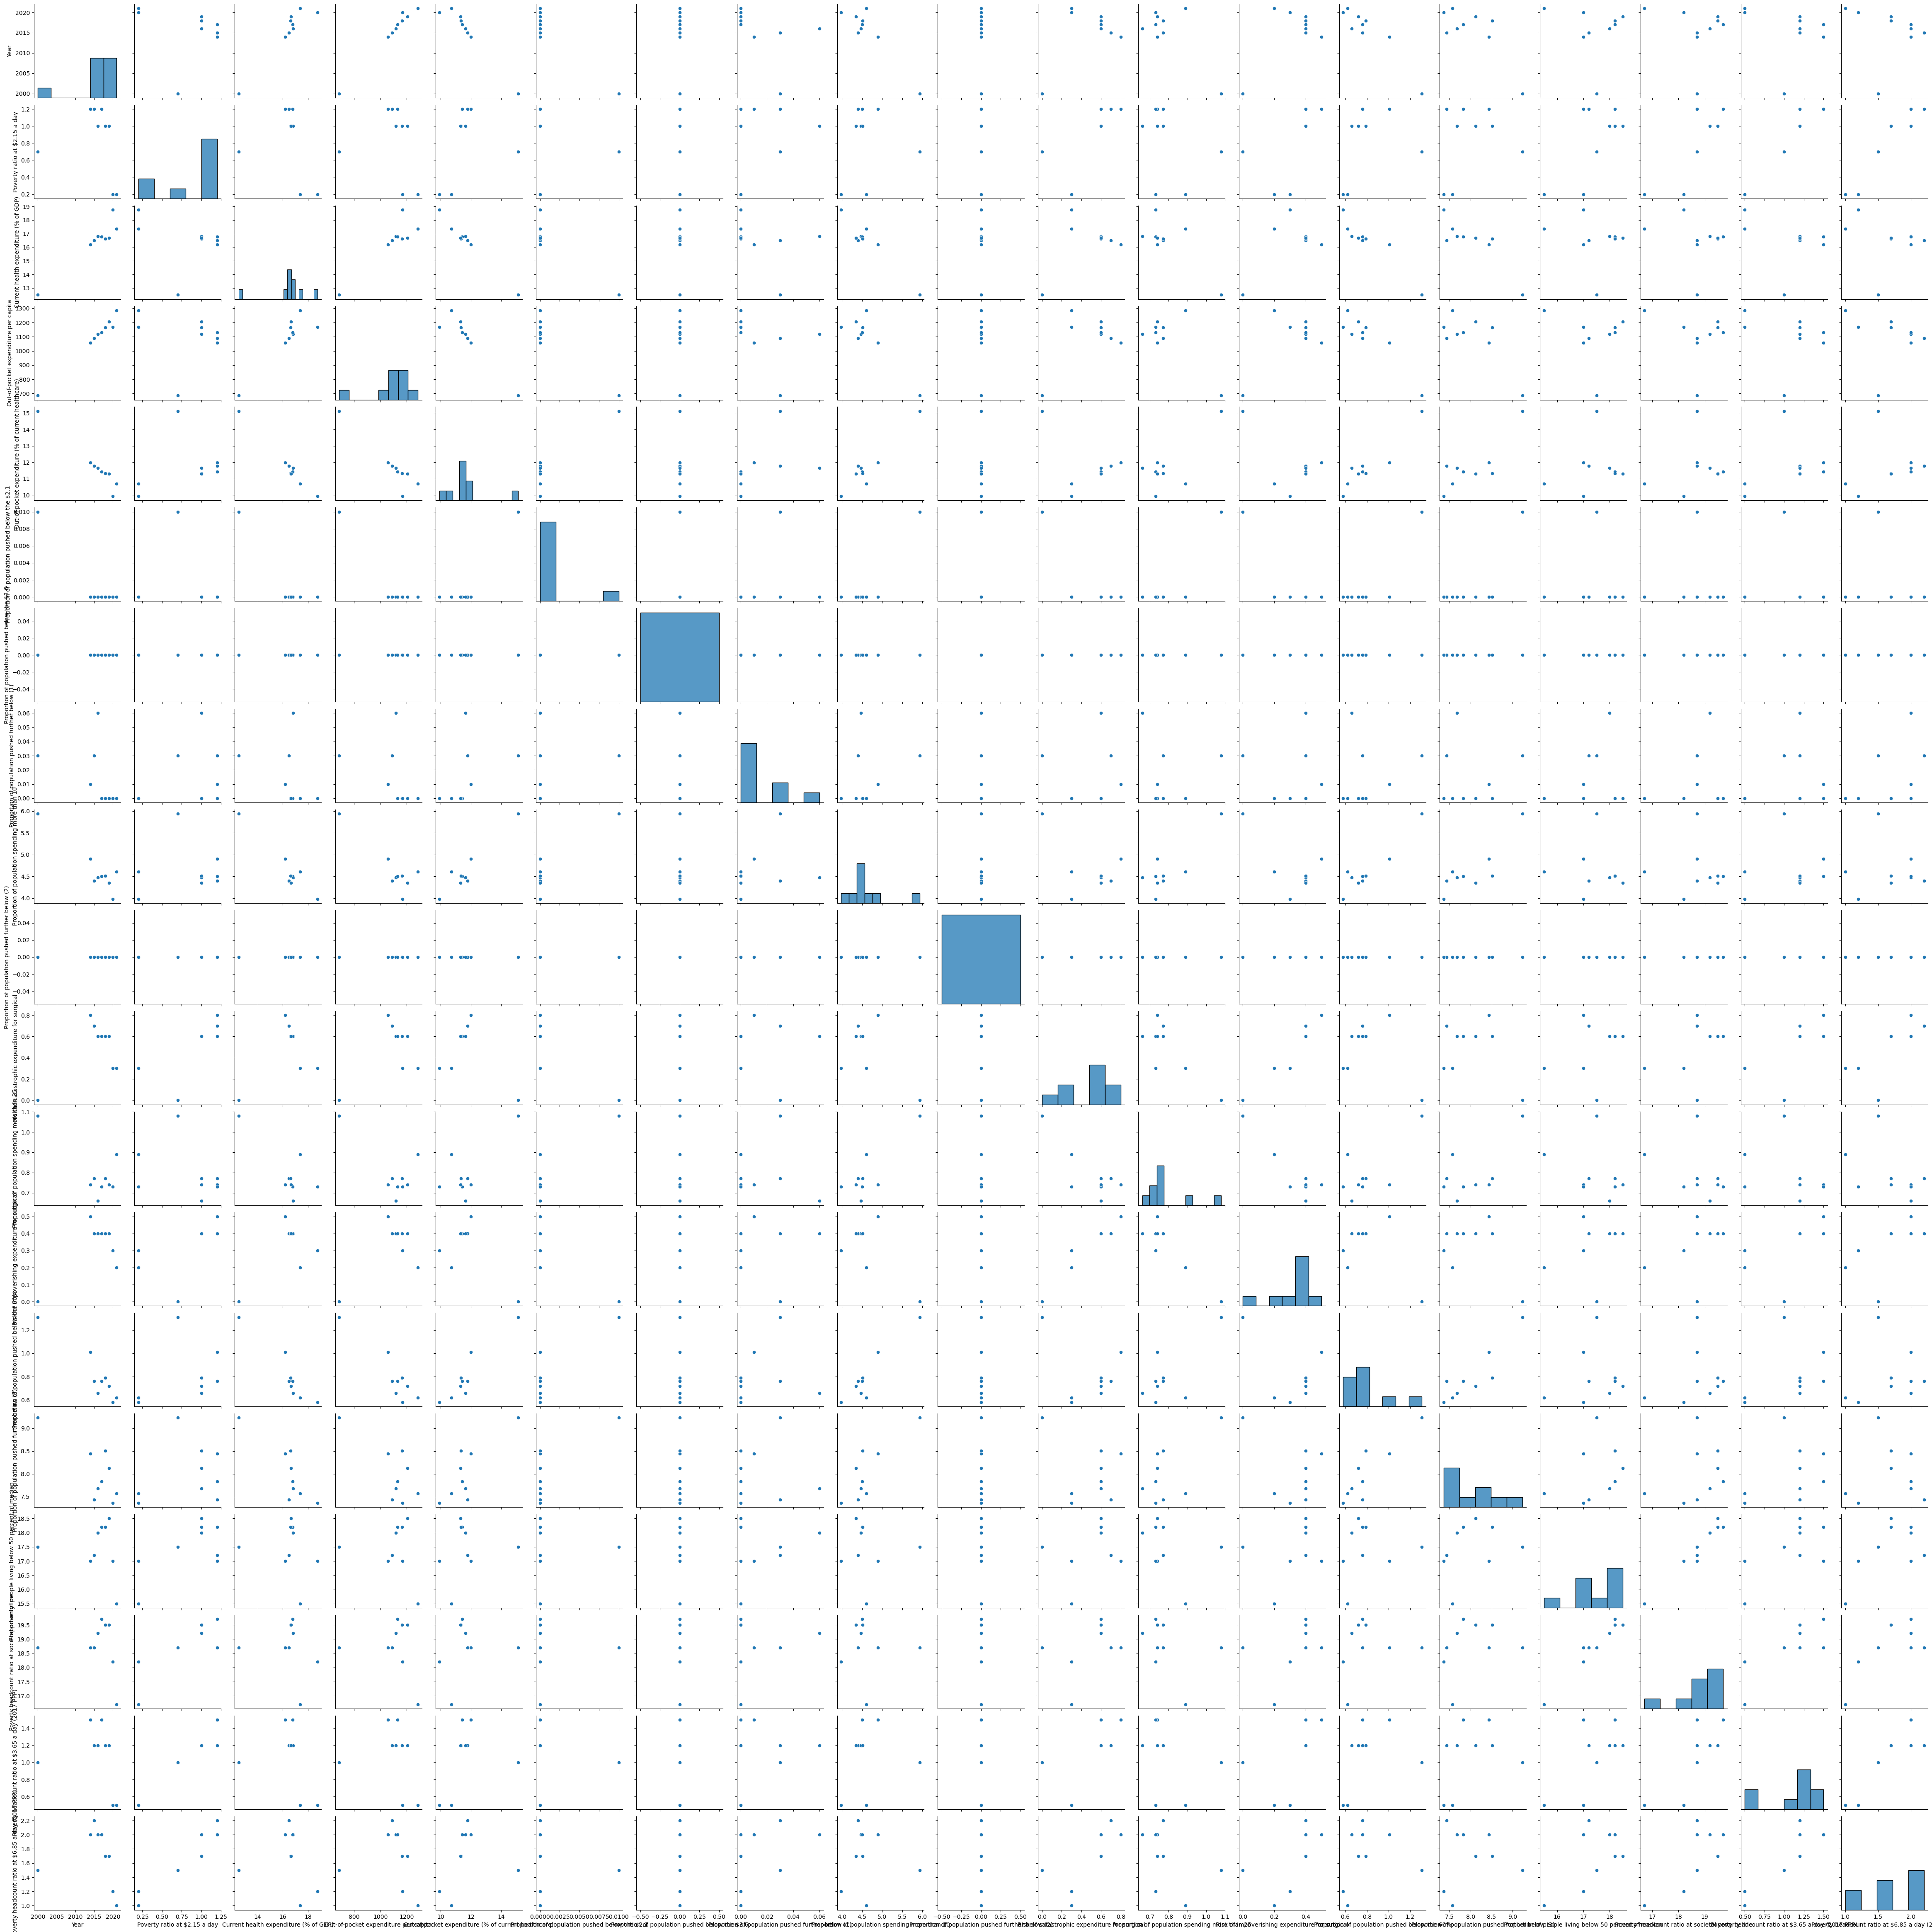

In [41]:
#I had some issues running a simple pairplot, even with all of the data converted to numeric types. 
#I redid some of the previous work just to insure that it would run the graphs.

# Fix column names and ensure no duplicates
worldbank.columns = [
    "Year",
    "Poverty ratio at $2.15 a day",
    "Current health expenditure (% of GDP)",
    "Out-of-pocket expenditure per capita",
    "Out-of-pocket expenditure (% of current healthcare)",
    "Proportion of population pushed below the $2.1",
    "Proportion of population pushed below the $3.6",
    "Proportion of population pushed further below (1)",
    "Proportion of population spending more than 10",
    "Proportion of population pushed further below (2)",
    "Risk of catastrophic expenditure for surgical",
    "Proportion of population spending more than 25",
    "Risk of impoverishing expenditure for surgical",
    "Proportion of population pushed below the 60%",
    "Proportion of population pushed further below (3)",
    "Proportion of people living below 50 percent of median",
    "Poverty headcount ratio at societal poverty line",
    "Poverty headcount ratio at $3.65 a day (2017 PPP)",
    "Poverty headcount ratio at $6.85 a day (2017 PPP)",
]

# Fill NaN values with 0
worldbank = worldbank.fillna(0)

# Convert all columns except 'Year' to float
for column in worldbank.columns:
    if column != "Year":
        worldbank[column] = pd.to_numeric(worldbank[column], errors='coerce').fillna(0)

# Verify the changes
print(worldbank.info())

# Select only numeric columns for the pair plot
numeric_cols = worldbank.select_dtypes(include=['number']).columns
fig = sns.pairplot(worldbank[numeric_cols])
plt.show()

In [43]:
fig.savefig('worldbank_pairplot.png')
worldbank.to_csv('worldbank_cleaned.csv')

TypeError: cannot unpack non-iterable Axes object

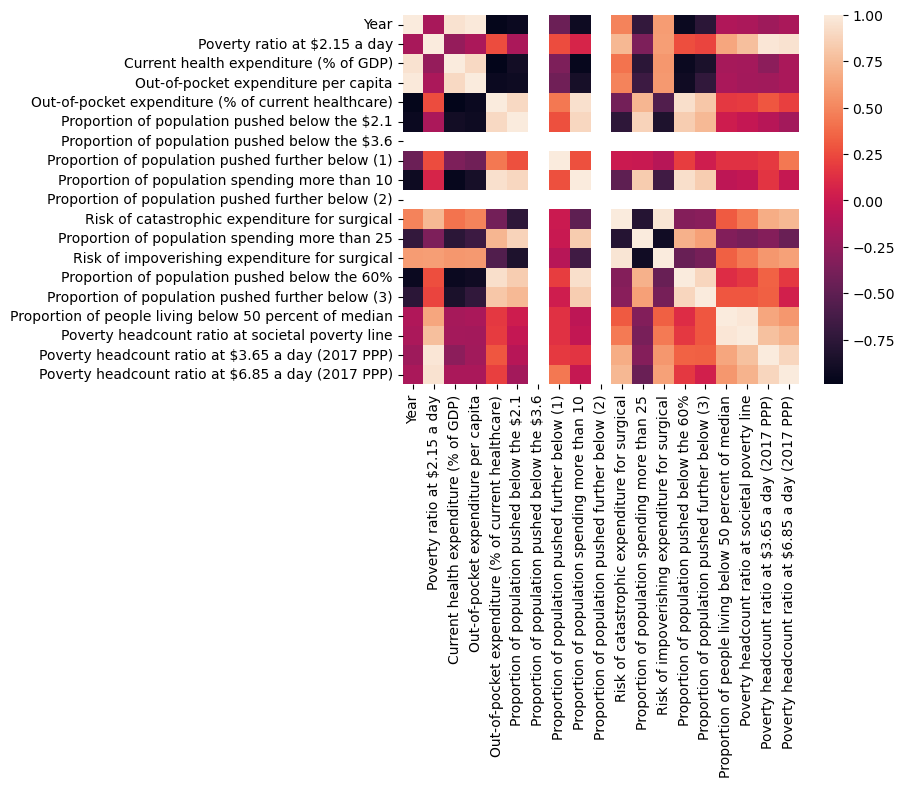

In [58]:
#Alright, and a heatmap of the correlations
fig2, ax = sns.heatmap(worldbank.corr())
fig2.savefig('worldbank_heatmap_correlations.png')

In [60]:
#I have nineteen columns, some are less necessary than others. I'll take a look at the df and see what can be omitted.
worldbank

,Year,Poverty ratio at $2.15 a day,Current health expenditure (% of GDP),Out-of-pocket expenditure per capita,Out-of-pocket expenditure (% of current healthcare),Proportion of population pushed below the $2.1,Proportion of population pushed below the $3.6,Proportion of population pushed further below (1),Proportion of population spending more than 10,Proportion of population pushed further below (2),Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Proportion of population pushed below the 60%,Proportion of population pushed further below (3),Proportion of people living below 50 percent of median,Poverty headcount ratio at societal poverty line,Poverty headcount ratio at $3.65 a day (2017 PPP),Poverty headcount ratio at $6.85 a day (2017 PPP)
0,2000,0.7,12.490026,685.395545,15.117374,0.01,0.0,0.03,5.94,0.0,0.0,1.08,0.0,1.31,9.23,17.5,18.7,1.0,1.5
1,2014,1.2,16.199198,1058.308042,11.987437,0.00,0.0,0.01,4.90,0.0,0.8,0.74,0.5,1.01,8.44,17.0,18.7,1.5,2.0
2,2015,1.2,16.490568,1089.018652,11.774530,0.00,0.0,0.03,4.40,0.0,0.7,0.77,0.4,0.76,7.43,17.2,18.7,1.2,2.2
3,2016,1.0,16.802158,1118.350962,11.649622,0.00,0.0,0.06,4.47,0.0,0.6,0.66,0.4,0.66,7.68,18.0,19.2,1.2,2.0
4,2017,1.2,16.767502,1130.686646,11.417827,0.00,0.0,0.00,4.50,0.0,0.6,0.73,0.4,0.76,7.83,18.2,19.7,1.5,2.0
5,2018,1.0,16.629644,1164.601932,11.328232,0.00,0.0,0.00,4.51,0.0,0.6,0.77,0.4,0.79,8.51,18.2,19.5,1.2,1.7
6,2019,1.0,16.665806,1205.284197,11.308306,0.00,0.0,0.00,4.35,0.0,0.6,0.74,0.4,0.72,8.12,18.5,19.5,1.2,1.7
7,2020,0.2,18.756220,1167.734563,9.931046,0.00,0.0,0.00,3.98,0.0,0.3,0.73,0.3,0.58,7.36,17.0,18.2,0.5,1.2
8,2021,0.2,17.362568,1285.330047,10.700169,0.00,0.0,0.00,4.61,0.0,0.3,0.89,0.2,0.62,7.57,15.5,16.7,0.5,1.0


In [64]:
#I'll create a new subset of the data.
orldbank_sub=worldbank[['Year', 'Out-of-pocket expenditure per capita', 'Proportion of population spending more than 10', 'Risk of catastrophic expenditure for surgical', 
                         'Proportion of population spending more than 25', 'Risk of impoverishing expenditure for surgical', 'Poverty headcount ratio at societal poverty line']]
worldbank_sub

,Year,Out-of-pocket expenditure per capita,Proportion of population spending more than 10,Risk of catastrophic expenditure for surgical,Proportion of population spending more than 25,Risk of impoverishing expenditure for surgical,Poverty headcount ratio at societal poverty line
0,2000,685.395545,5.94,0.0,1.08,0.0,18.7
1,2014,1058.308042,4.90,0.8,0.74,0.5,18.7
2,2015,1089.018652,4.40,0.7,0.77,0.4,18.7
3,2016,1118.350962,4.47,0.6,0.66,0.4,19.2
4,2017,1130.686646,4.50,0.6,0.73,0.4,19.7
5,2018,1164.601932,4.51,0.6,0.77,0.4,19.5
6,2019,1205.284197,4.35,0.6,0.74,0.4,19.5
7,2020,1167.734563,3.98,0.3,0.73,0.3,18.2
8,2021,1285.330047,4.61,0.3,0.89,0.2,16.7


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

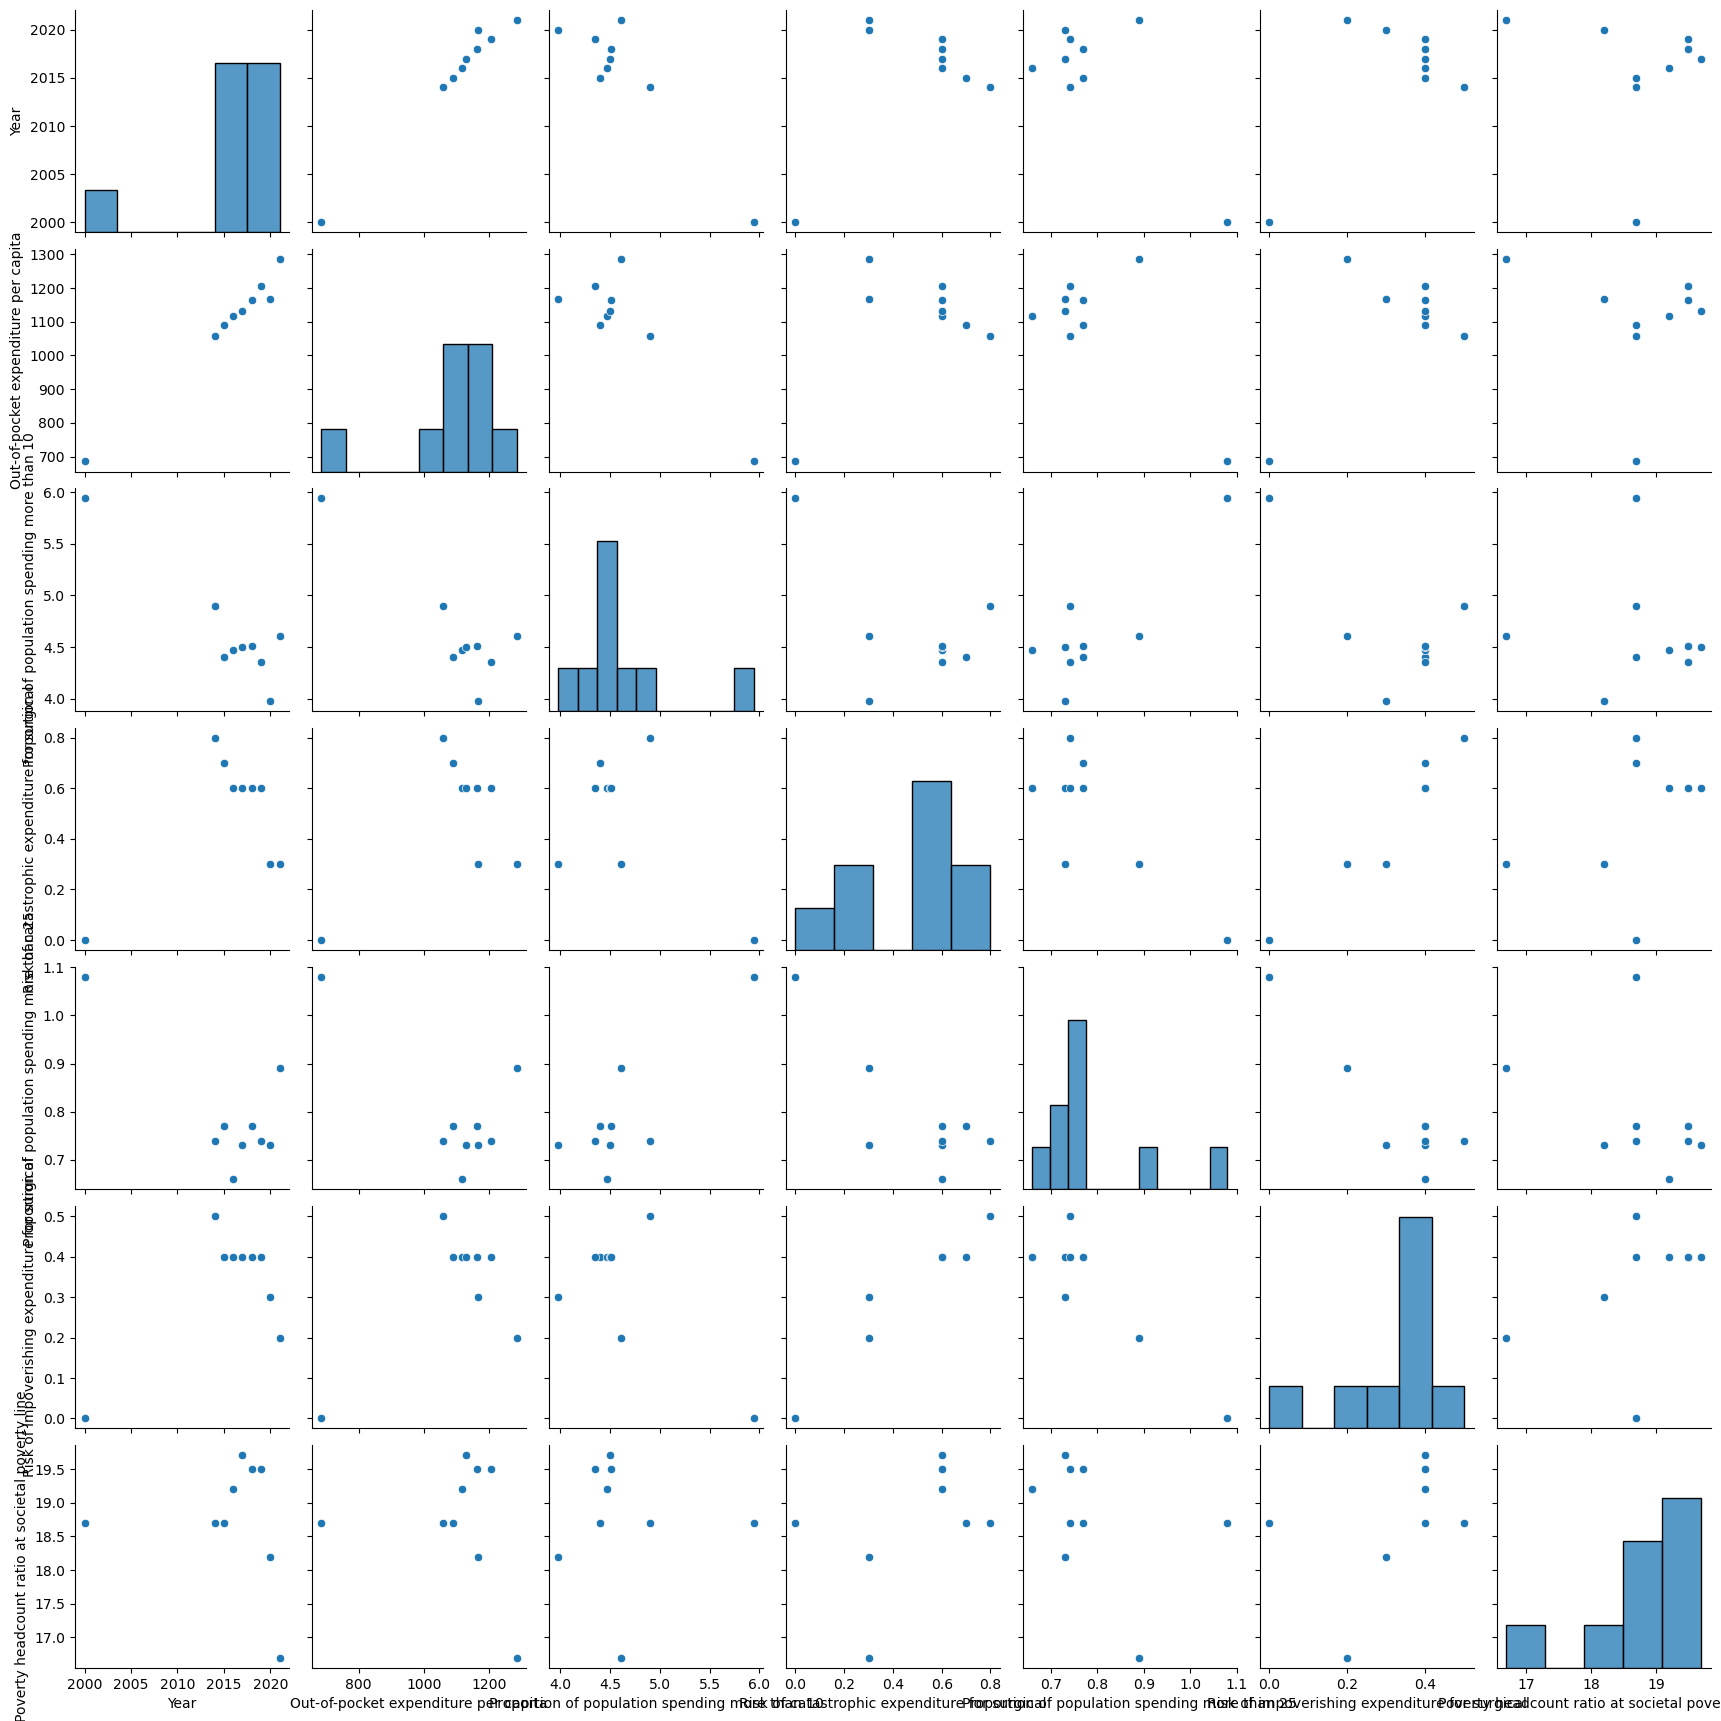

In [66]:
sns.pairplot(worldbank_sub)

In [68]:
#I'll save this subset of the data.
worldbank_sub.to_csv('worldbank_subset_cleaned.csv')